In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# importing the file and checking the main features

In [62]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

In [63]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [64]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Renaming the columns and normalizing the format

In [65]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

In [66]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [67]:
# Creating function to seperate the data into continuous and discrete portions

In [68]:
def function(x):
    conti=[]
    disc=[]
    for i in x.columns:
        if x[i].nunique()>=10:
            conti.append(i)
        else:
            disc.append(i)
    return conti,disc

conti,disc=function(customer_df)

In [69]:
conti

['customer',
 'customer_lifetime_value',
 'effective_to_date',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'total_claim_amount']

In [70]:
continuous_df=customer_df[conti]
discrete_df=customer_df[disc]

In [71]:
continuous_df.head()

customer  customer_lifetime_value effective_to_date  income  \
0  BU79786              2763.519279        2011-02-24   56274   
1  QZ44356              6979.535903        2011-01-31       0   
2  AI49188             12887.431650        2011-02-19   48767   
3  WW63253              7645.861827        2011-01-20       0   
4  HB64268              2813.692575        2011-02-03   43836   

   monthly_premium_auto  months_since_last_claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   months_since_policy_inception  total_claim_amount  
0                              5          384.811147  
1                             42         1131.464935  
2                             38          566.472247  
3                             65          529.881344  
4                             44          138.130879

# Correlation matrix

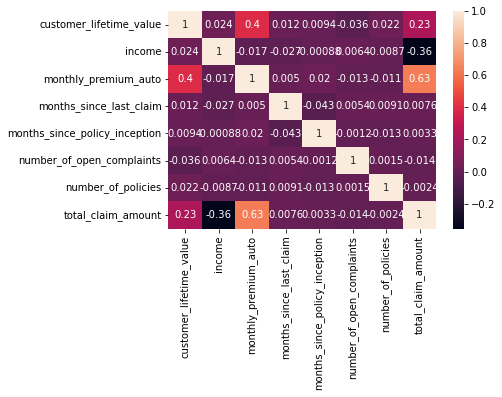

In [72]:
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [73]:
# The correlation between total_claim_amount and monthly_premium_auto is 0.63 and this is the highest correlation in this matrix.
# In this case we don't need to consider to drop any columns.

# Creating function to every variable

In [74]:
def plot_discrete(x):
    for i in x.columns:
        x[i].hist()
        plt.show()
    return


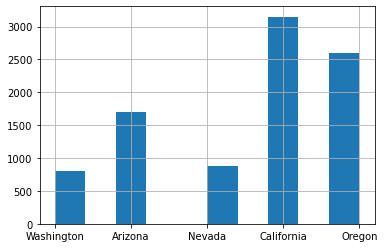

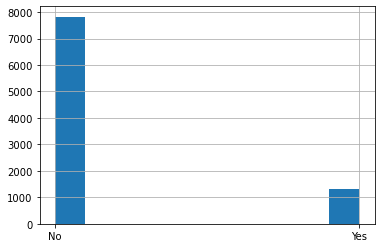

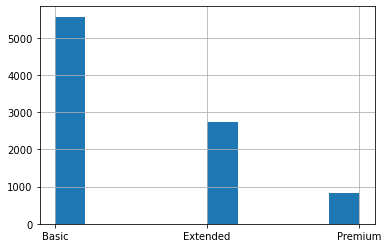

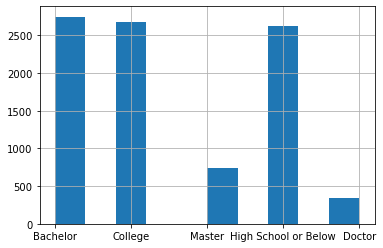

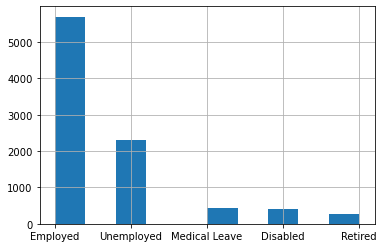

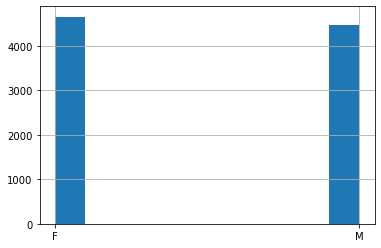

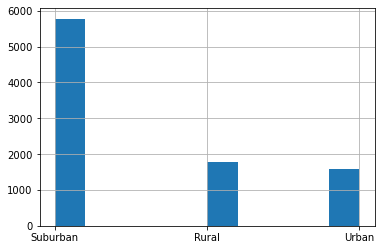

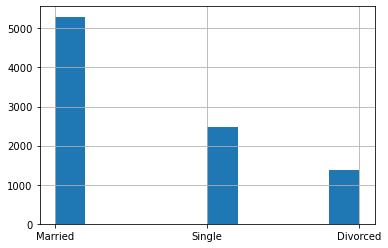

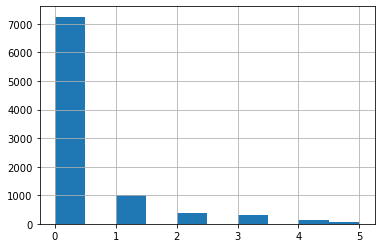

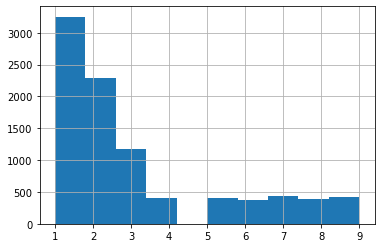

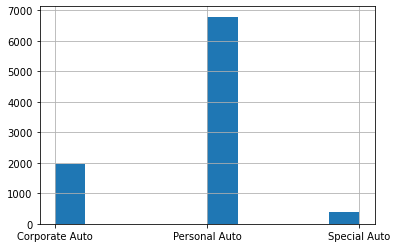

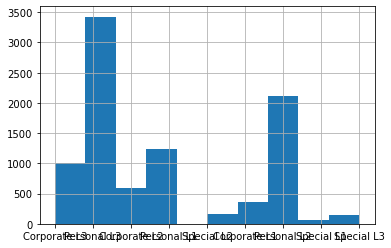

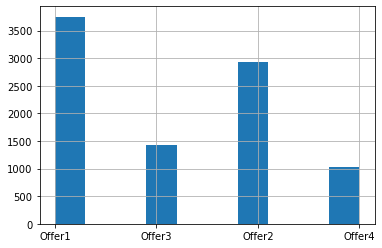

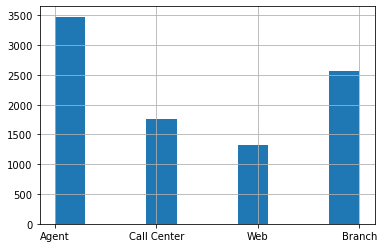

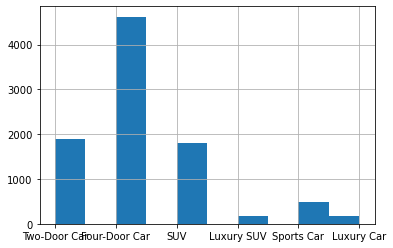

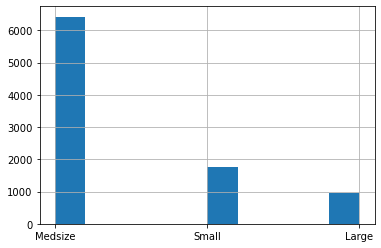

In [75]:
plot_discrete(discrete_df)

In [76]:
def plot_conti(x):
    for i in x.drop(['customer','effective_to_date'],axis=1).columns:
        sns.distplot(x[i])
        plt.show()
    return

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


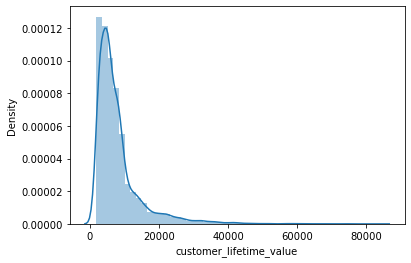

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


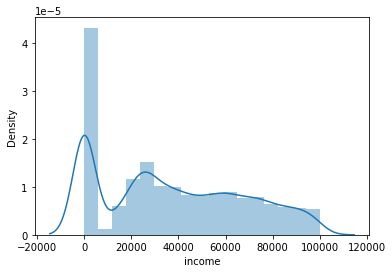

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


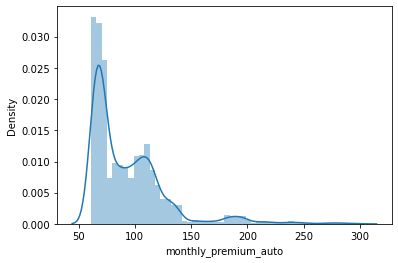

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


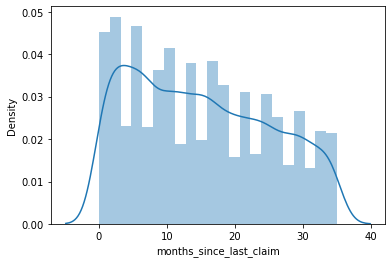

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


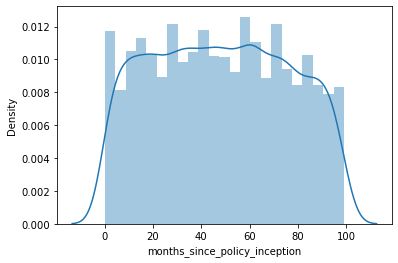

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


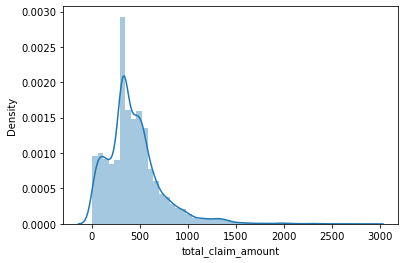

In [77]:
plot_conti(continuous_df)

# Creating plots to look for outliers

In [78]:
def plot_outliers(x):
    for i in x.drop(['customer','effective_to_date'],axis=1).columns:
        sns.boxplot(y=x[i])
        plt.show()
    return

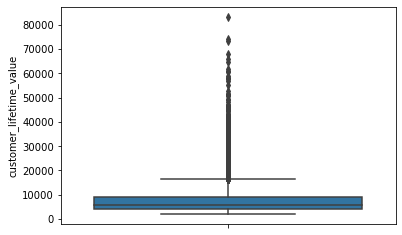

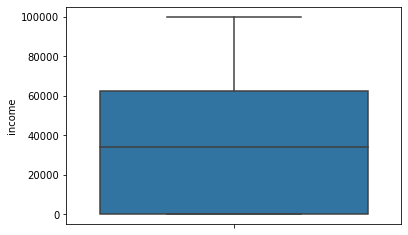

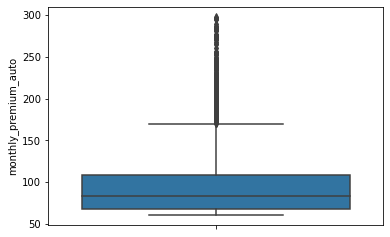

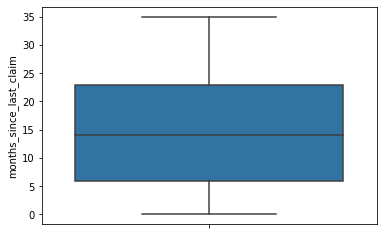

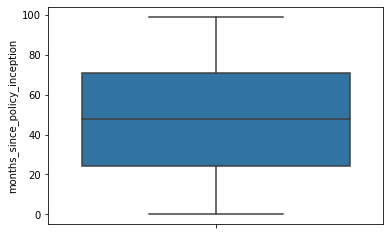

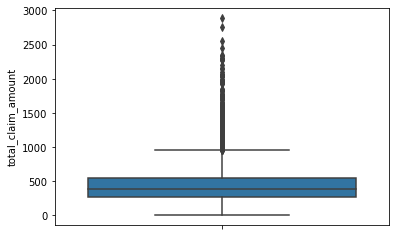

In [79]:
plot_outliers(continuous_df)

# Checking for NaN values

In [80]:
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Selecting the categorical data

In [81]:
categorical_df=customer_df.select_dtypes(object)

In [82]:
categorical_df.head()

customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [83]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [84]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [85]:
for name in categorical_df.columns:
    display(categorical_df[name].unique())

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Basic', 'Extended', 'Premium'], dtype=object)

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

array(['F', 'M'], dtype=object)

array(['Suburban', 'Rural', 'Urban'], dtype=object)

array(['Married', 'Single', 'Divorced'], dtype=object)

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

array(['Medsize', 'Small', 'Large'], dtype=object)

In [86]:
# The values in customer, policy and renew_offer_type columns contain alpha and numeric data. In my opinion we can directly drop the customer column and keep the other two columns.

In [87]:
# Comparing witb policy_type and policy i think the most important thing is policy_type. 
# The policy_type contain three different classes Corporate, Personal and Special. In policy column it has subclasses under these three classes L1,L2,L3
# When the policy_type is Corporate then the policy should be corporate but which subclasses it belongs to depends on the case. 
# In my opinion we can transfer the policy column to numerical column. 

In [88]:
for name in categorical_df.columns:
    display(categorical_df[name].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [89]:
# There are a few ways to make the columns simpler.
# First of all we can drop the customer column.
categorical_df=categorical_df.drop('customer',axis=1)

In [90]:
#Secondly we can combine some of the classes together. For example in employment_status we can merge Medical leave, disabled and retired into one class and name it 'other'
categorical_df['employmentstatus']=np.where(categorical_df['employmentstatus'].isin(['Employed','Unemployed']),categorical_df['employmentstatus'],'other')

In [91]:
# We can transfer the policy to numerical column.
#categorical_df['policy']=categorical_df['policy'].str.split('L',expand=True)[1]

In [92]:
#categorical_df['policy'].value_counts()

# Lab Feature extraction

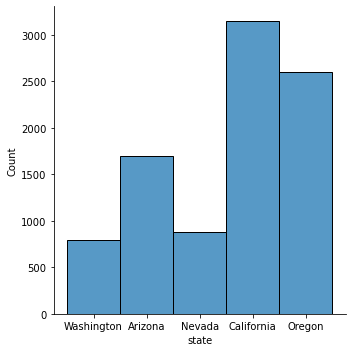

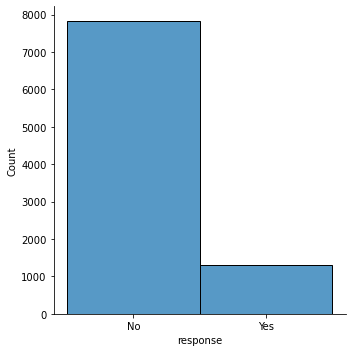

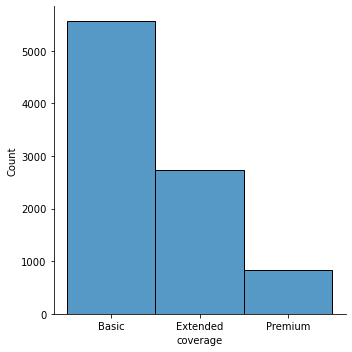

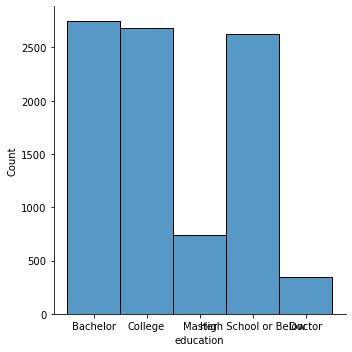

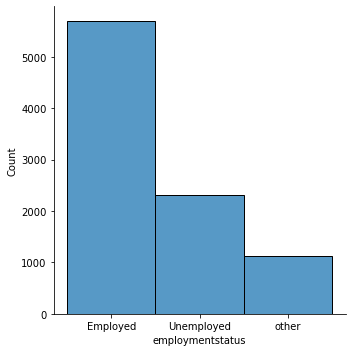

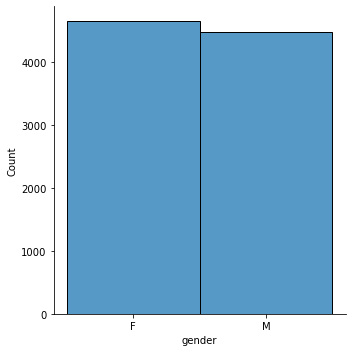

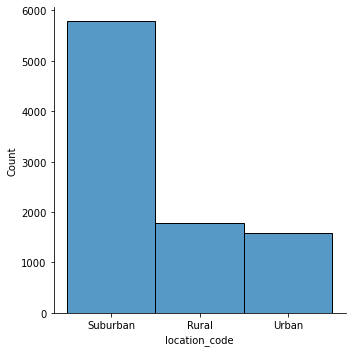

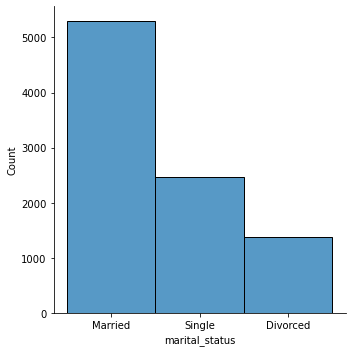

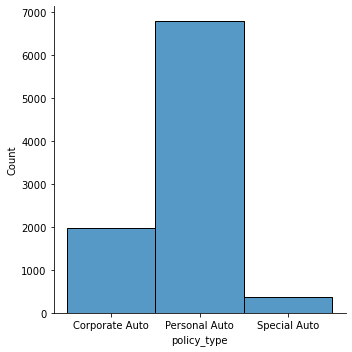

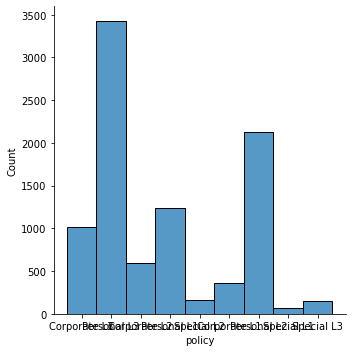

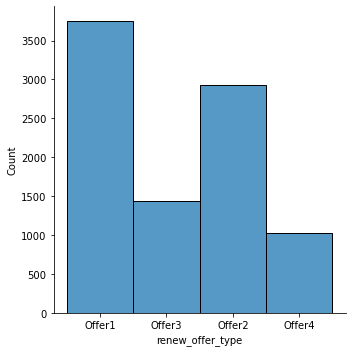

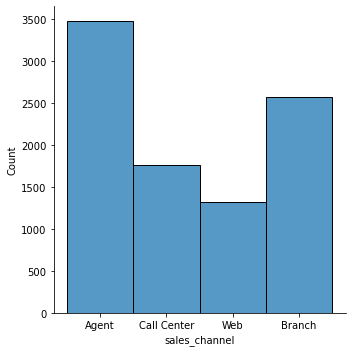

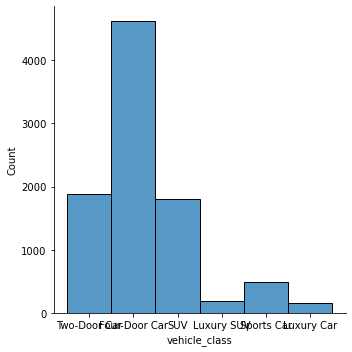

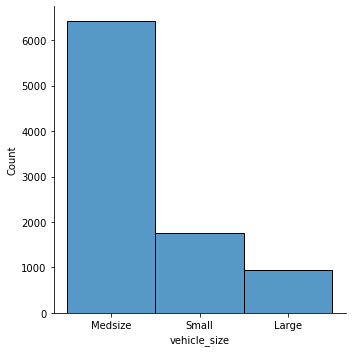

In [93]:
for name in categorical_df.columns:
    sns.displot(data=categorical_df[name])
    plt.show()

In [94]:
# The policy and policy_type column seem to be redundant. I select to transfer the policy column to numerical.

In [95]:
time_df=customer_df[['customer','effective_to_date']]

In [96]:
time_df.head()

customer effective_to_date
0  BU79786        2011-02-24
1  QZ44356        2011-01-31
2  AI49188        2011-02-19
3  WW63253        2011-01-20
4  HB64268        2011-02-03

In [97]:
time_df.nunique()

customer             9134
effective_to_date      59
dtype: int64

In [98]:
time_df=time_df.groupby(['effective_to_date']).agg({'customer':pd.Series.nunique}).rename(columns={'customer':'number'})

<AxesSubplot:xlabel='effective_to_date', ylabel='number'>

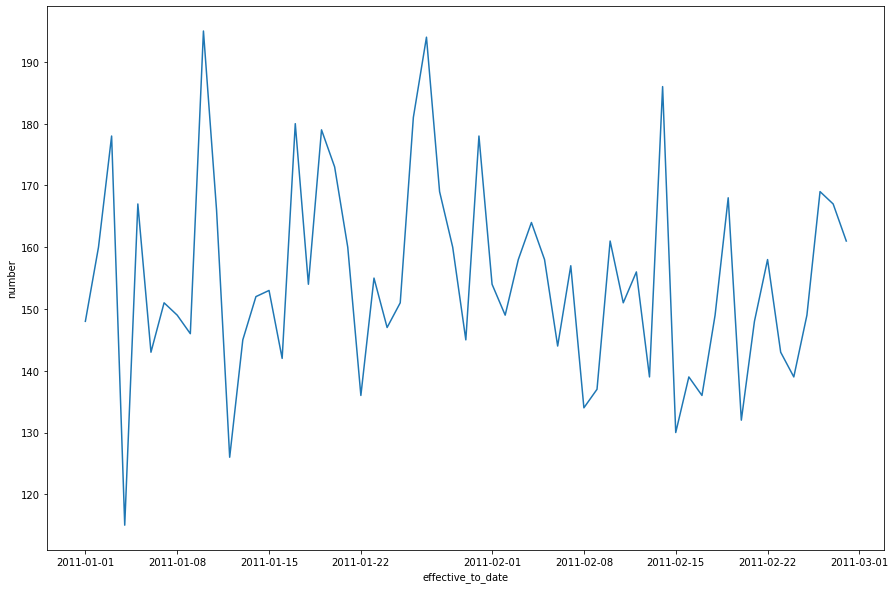

In [99]:
plt.figure(figsize=(15,10))

sns.lineplot(data=time_df,x='effective_to_date',y='number')

# Comparing regression model

In [259]:
from sklearn.model_selection import train_test_split

## cleaning the data

In [260]:
comp_reg=customer_df.copy()

In [261]:
comp_reg.head().T

0                    1  \
customer                                   BU79786              QZ44356   
state                                   Washington              Arizona   
customer_lifetime_value                2763.519279          6979.535903   
response                                        No                   No   
coverage                                     Basic             Extended   
education                                 Bachelor             Bachelor   
effective_to_date              2011-02-24 00:00:00  2011-01-31 00:00:00   
employmentstatus                          Employed           Unemployed   
gender                                           F                    F   
income                                       56274                    0   
location_code                             Suburban             Suburban   
marital_status                             Married               Single   
monthly_premium_auto                            69                   94   
months_since_last_claim                         32                   13   
months_since_policy_inception                    5                   42   
number_of_open_complaints                        0                    0   
number_of_policies                               1                    8   
policy_type                         Corporate Auto        Personal Auto   
policy                                Corporate L3          Personal L3   
renew_offer_type                            Offer1               Offer3   
sales_channel                                Agent                Agent   
total_claim_amount                      384.811147          1131.464935   
vehicle_class                         Two-Door Car        Four-Door Car   
vehicle_size                               Medsize              Medsize   

                                                 2                    3  \
customer                                   AI49188              WW63253   
state                                       Nevada           California   
customer_lifetime_value                12887.43165          7645.861827   
response                                        No                   No   
coverage                                   Premium                Basic   
education                                 Bachelor             Bachelor   
effective_to_date              2011-02-19 00:00:00  2011-01-20 00:00:00   
employmentstatus                          Employed           Unemployed   
gender                                           F                    M   
income                                       48767                    0   
location_code                             Suburban             Suburban   
marital_status                             Married              Married   
monthly_premium_auto                           108                  106   
months_since_last_claim                         18                   18   
months_since_policy_inception                   38                   65   
number_of_open_complaints                        0                    0   
number_of_policies                               2                    7   
policy_type                          Personal Auto       Corporate Auto   
policy                                 Personal L3         Corporate L2   
renew_offer_type                            Offer1               Offer1   
sales_channel                                Agent          Call Center   
total_claim_amount                      566.472247           529.881344   
vehicle_class                         Two-Door Car                  SUV   
vehicle_size                               Medsize              Medsize   

                                                 4  
customer                                   HB64268  
state                                   Washington  
customer_lifetime_value                2813.692575  
response                                        No  
coverage                        

In [262]:
comp_reg['day_of_week']=comp_reg['effective_to_date'].dt.weekday

In [263]:
comp_reg['month']=comp_reg['effective_to_date'].dt.month

In [264]:
comp_reg.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income  ... number_of_policies  \
0        2011-02-24         Employed      F   56274  ...                  1   
1        2011-01-31       Unemployed      F       0  ...                  8   
2        2011-02-19         Employed      F   48767  ...                  2   
3        2011-01-20       Unemployed      M       0  ...                  7   
4        2011-02-03         Employed      M   43836  ...                  1   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

   total_claim_amount  vehicle_class vehicle_size day_of_week month  
0          384.811147   Two-Door Car      Medsize           3     2  
1         1131.464935  Four-Door Car      Medsize           0     1  
2          566.472247   Two-Door Car      Medsize           5     2  
3          529.881344            SUV      Medsize           3     1  
4          138.130879  Four-Door Car      Medsize           3     2  

[5 rows x 26 columns]

In [265]:
comp_reg=comp_reg.drop(['customer','effective_to_date'],axis=1)

In [266]:
comp_reg['employmentstatus']=np.where(comp_reg['employmentstatus'].isin(['Employed','Unemployed']),comp_reg['employmentstatus'],'other')

In [267]:
comp_reg['education']=np.where(comp_reg['education'].isin(['Bachelor','College','High School or Below']),comp_reg['education'],'Above Bachelor')

In [268]:
comp_reg['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Above Bachelor          1083
Name: education, dtype: int64

In [269]:
comp_reg['policy']=comp_reg['policy'].str.split('L',expand=True)[1]

In [270]:
comp_reg['vehicle_class']=np.where(comp_reg['vehicle_class'].isin(['Four-Door Car','Two-Door Car','SUV']),comp_reg['vehicle_class'],'other')

In [271]:
comp_reg['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [272]:
#def filter_outliers(x,y):
   # iqr = np.percentile(x[y],75) - np.percentile(x[y],25)
   # upper_limit = np.percentile(x[y],75) + 1.5*iqr
   # lower_limit = np.percentile(x[y],25) - 1.5*iqr
   # x = x[(x[y]>lower_limit) & (x[y]<upper_limit)].copy()
   # return x


In [273]:
comp_reg.shape

(9134, 24)

In [274]:
#filter_outliers(comp_reg,'customer_lifetime_value')

In [275]:
#filter_outliers(comp_reg,'monthly_premium_auto')

In [276]:
for i in comp_reg.columns:
    print(comp_reg[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Above Bachelor          1083
Name: education, dtype: int64
Employed      5698
Unemployed    2317
other         1119
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64
Suburban

In [277]:
# transfering the numerical columns that seem like categorical one to categorical column.

In [278]:
comp_reg['day_of_week']=comp_reg['day_of_week'].astype(object)
comp_reg['month']=comp_reg['month'].astype(object)
comp_reg['policy_type']=comp_reg['policy_type'].astype(object)
comp_reg['number_of_open_complaints']=comp_reg['number_of_open_complaints'].astype(object)

## spliting x and y and normalizing the data

In [279]:
comp_reg=comp_reg.reset_index(drop=True)
y=comp_reg['total_claim_amount']
X=comp_reg.drop('total_claim_amount',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(9134, 23)

In [280]:
X_train_num=X_train.select_dtypes(np.number)
X_train_cat=X_train.select_dtypes(object)

X_test_num=X_test.select_dtypes(np.number)
X_test_cat=X_test.select_dtypes(object)

In [281]:
# scaling the numerical data

In [282]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
X_norm = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_norm, columns=X_train_num.columns)
X_train_norm.head()

X_test_norm=pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_test_norm.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.024824  0.666887              0.152542   
1                 0.068883  0.000000              0.025424   
2                 0.008758  0.134266              0.042373   
3                 0.071349  0.000000              0.220339   
4                 0.035567  0.700253              0.245763   

   months_since_last_claim  months_since_policy_inception  number_of_policies  
0                 0.000000                       0.404040               0.000  
1                 0.457143                       0.121212               0.125  
2                 0.857143                       0.787879               0.000  
3                 0.000000                       0.111111               0.250  
4                 0.628571                       0.333333               0.000

In [283]:
# encoding the categorical data

In [284]:
X_train_cat.head()

state response coverage education employmentstatus gender  \
3383     Arizona      Yes    Basic  Bachelor         Employed      M   
7891     Arizona       No    Basic   College            other      F   
4633      Oregon       No    Basic  Bachelor            other      F   
3894      Oregon      Yes    Basic   College         Employed      F   
8120  California       No    Basic  Bachelor       Unemployed      M   

     location_code marital_status number_of_open_complaints     policy_type  \
3383      Suburban        Married                         0  Corporate Auto   
7891      Suburban       Divorced                         0   Personal Auto   
4633      Suburban       Divorced                         0   Personal Auto   
3894         Urban        Married                         0   Personal Auto   
8120      Suburban         Single                         0   Personal Auto   

     policy renew_offer_type sales_channel  vehicle_class vehicle_size  \
3383      2           Offer2         Agent   Two-Door Car      Medsize   
7891      2           Offer1         Agent   Two-Door Car        Small   
4633      3           Offer1           Web   Two-Door Car      Medsize   
3894      2           Offer2         Agent  Four-Door Car      Medsize   
8120      2           Offer1   Call Center  Four-Door Car      Medsize   

     day_of_week month  
3383           0     1  
7891           1     1  
4633           6     1  
3894           3     1  
8120           2     1

In [285]:
X_train_cat_ordinal=X_train_cat[['coverage','employmentstatus','location_code','vehicle_size']]
X_train_cat_onehot=X_train_cat.drop(['coverage','employmentstatus','location_code','vehicle_size'],axis=1)

X_test_cat_ordinal=X_test_cat[['coverage','employmentstatus','location_code','vehicle_size']]
X_test_cat_onehot=X_test_cat.drop(['coverage','employmentstatus','location_code','vehicle_size'],axis=1)

In [286]:
X_train_cat_ordinal.head()

coverage employmentstatus location_code vehicle_size
3383    Basic         Employed      Suburban      Medsize
7891    Basic            other      Suburban        Small
4633    Basic            other      Suburban      Medsize
3894    Basic         Employed         Urban      Medsize
8120    Basic       Unemployed      Suburban      Medsize

In [287]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat_onehot)
encoded_for_p1 = encoder.transform(X_train_cat_onehot).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat_onehot.columns)
X_train_cat_onehot_encoded = pd.DataFrame(encoded_for_p1, columns=cols)
X_train_cat_onehot_encoded.head()

encoded_for_p2 = encoder.transform(X_test_cat_onehot).toarray()
cols1 = encoder.get_feature_names(input_features=X_test_cat_onehot.columns)
X_test_cat_onehot_encoded = pd.DataFrame(encoded_for_p2, columns=cols1)
X_test_cat_onehot_encoded.head()



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


state_California  state_Nevada  state_Oregon  state_Washington  \
0               1.0           0.0           0.0               0.0   
1               1.0           0.0           0.0               0.0   
2               0.0           0.0           1.0               0.0   
3               0.0           0.0           1.0               0.0   
4               1.0           0.0           0.0               0.0   

   response_Yes  education_Bachelor  education_College  \
0           1.0                 0.0                0.0   
1           0.0                 1.0                0.0   
2           0.0                 1.0                0.0   
3           0.0                 0.0                1.0   
4           0.0                 0.0                1.0   

   education_High School or Below  gender_M  marital_status_Married  ...  \
0                             1.0       0.0                     1.0  ...   
1                             0.0       1.0                     1.0  ...   
2                             0.0       0.0                     0.0  ...   
3                             0.0       0.0                     0.0  ...   
4                             0.0       0.0                     1.0  ...   

   vehicle_class_SUV  vehicle_class_Two-Door Car  vehicle_class_other  \
0                0.0                         0.0                  0.0   
1                0.0                         1.0                  0.0   
2                0.0                         0.0                  0.0   
3                0.0                         0.0                  0.0   
4                1.0                         0.0                  0.0   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0            0.0            1.0            0.0            0.0            0.0   
1            0.0            1.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            1.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            1.0   

   day_of_week_6  month_2  
0            0.0      0.0  
1            0.0      0.0  
2            1.0      0.0  
3            0.0      1.0  
4            0.0      1.0  

[5 rows x 36 columns]

In [288]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder().fit(X_train_cat_ordinal)
ordinal_for_train = ordinal_enc.transform(X_train_cat_ordinal)
X_train_cat_ordinal_encoded = pd.DataFrame(ordinal_for_train,columns=X_train_cat_ordinal.columns)
X_train_cat_ordinal_encoded.head()

ordinal_for_test = ordinal_enc.transform(X_test_cat_ordinal)
X_test_cat_ordinal_encoded = pd.DataFrame(ordinal_for_test,columns=X_test_cat_ordinal.columns)
X_test_cat_ordinal_encoded.head()


coverage  employmentstatus  location_code  vehicle_size
0       1.0               0.0            1.0           2.0
1       0.0               1.0            1.0           1.0
2       0.0               2.0            1.0           1.0
3       2.0               1.0            1.0           1.0
4       0.0               0.0            1.0           2.0

In [292]:
X_train_cat_onehot_encoded.head()

state_California  state_Nevada  state_Oregon  state_Washington  \
0               0.0           0.0           0.0               0.0   
1               0.0           0.0           0.0               0.0   
2               0.0           0.0           1.0               0.0   
3               0.0           0.0           1.0               0.0   
4               1.0           0.0           0.0               0.0   

   response_Yes  education_Bachelor  education_College  \
0           1.0                 1.0                0.0   
1           0.0                 0.0                1.0   
2           0.0                 1.0                0.0   
3           1.0                 0.0                1.0   
4           0.0                 1.0                0.0   

   education_High School or Below  gender_M  marital_status_Married  ...  \
0                             0.0       1.0                     1.0  ...   
1                             0.0       0.0                     0.0  ...   
2                             0.0       0.0                     0.0  ...   
3                             0.0       0.0                     1.0  ...   
4                             0.0       1.0                     0.0  ...   

   vehicle_class_SUV  vehicle_class_Two-Door Car  vehicle_class_other  \
0                0.0                         1.0                  0.0   
1                0.0                         1.0                  0.0   
2                0.0                         1.0                  0.0   
3                0.0                         0.0                  0.0   
4                0.0                         0.0                  0.0   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0            0.0            0.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            1.0            0.0            0.0   
4            0.0            1.0            0.0            0.0            0.0   

   day_of_week_6  month_2  
0            0.0      0.0  
1            0.0      0.0  
2            1.0      0.0  
3            0.0      0.0  
4            0.0      0.0  

[5 rows x 36 columns]

In [295]:
X_train_cat_norm=pd.concat([X_train_cat_onehot_encoded,X_train_cat_ordinal_encoded],axis=1)
X_test_cat_norm=pd.concat([X_test_cat_onehot_encoded,X_test_cat_ordinal_encoded],axis=1)

In [296]:
X_train_cat_norm.head()

state_California  state_Nevada  state_Oregon  state_Washington  \
0               0.0           0.0           0.0               0.0   
1               0.0           0.0           0.0               0.0   
2               0.0           0.0           1.0               0.0   
3               0.0           0.0           1.0               0.0   
4               1.0           0.0           0.0               0.0   

   response_Yes  education_Bachelor  education_College  \
0           1.0                 1.0                0.0   
1           0.0                 0.0                1.0   
2           0.0                 1.0                0.0   
3           1.0                 0.0                1.0   
4           0.0                 1.0                0.0   

   education_High School or Below  gender_M  marital_status_Married  ...  \
0                             0.0       1.0                     1.0  ...   
1                             0.0       0.0                     0.0  ...   
2                             0.0       0.0                     0.0  ...   
3                             0.0       0.0                     1.0  ...   
4                             0.0       1.0                     0.0  ...   

   day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            1.0   
3            0.0            1.0            0.0            0.0            0.0   
4            1.0            0.0            0.0            0.0            0.0   

   month_2  coverage  employmentstatus  location_code  vehicle_size  
0      0.0       0.0               0.0            1.0           1.0  
1      0.0       0.0               2.0            1.0           2.0  
2      0.0       0.0               2.0            1.0           1.0  
3      0.0       0.0               0.0            2.0           1.0  
4      0.0       0.0               1.0            1.0           1.0  

[5 rows x 40 columns]

In [297]:
X_train_cat_norm=X_train_cat_norm.reset_index(drop=True)
X_test_cat_norm=X_test_cat_norm.reset_index(drop=True)

In [299]:
X_train_transformed=pd.concat([X_train_norm,X_train_cat_norm],axis=1)
X_test_transformed=pd.concat([X_test_norm,X_test_cat_norm],axis=1)

In [ ]:
# creating models

In [300]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train_transformed,y_train)


LinearRegression()

In [301]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train_transformed)
print('R2 score for the training set is:', r2_score(y_train, predictions))

R2 score for the training set is: 0.6269775529405056


In [302]:
predictions=lm.predict(X_test_transformed)
print('R2 score for the testing set is:', r2_score(y_test, predictions))

R2 score for the testing set is: 0.611821919354883


In [303]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train_transformed, y_train)

KNeighborsRegressor(n_neighbors=3)

In [304]:
score = KNN.score(X_test_transformed, y_test)
score

0.5292636911609034

In [305]:
score1 = KNN.score(X_train_transformed, y_train)
score1

0.7627726580015983

In [306]:
scores = []
for k in range(2,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_transformed, y_train)
    scores.append(model.score(X_test_transformed, y_test))

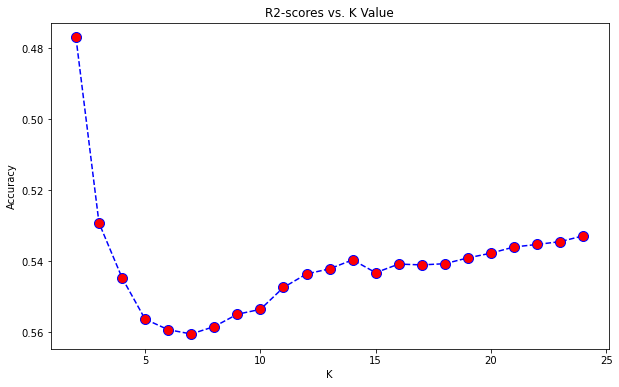

In [307]:
plt.figure(figsize=(10,6))
plt.plot(range(2,25),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [308]:
# According to the plot. When the number of Neighbors equals 5, we can get the best score.
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_transformed, y_train)
score = KNN.score(X_test_transformed, y_test)
score1 = KNN.score(X_train_transformed, y_train)

In [310]:
print('test:',score,'train:',score1)

test: 0.5563709710026679 train: 0.7067148504094956


In [311]:
from sklearn.neural_network import MLPRegressor

In [312]:
mlp=MLPRegressor()
mlp.fit(X_train_transformed,y_train)

D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [313]:
score2=mlp.score(X_test_transformed,y_test)

In [314]:
score2

0.7409405730860288

In [ ]:
#creating function

In [326]:
def multi_model(num,x,y,x1,y1,k=3):
    if num ==1:
        from sklearn import linear_model
        from sklearn.metrics import r2_score
        lm = linear_model.LinearRegression()
        lm.fit(x,y)
        predictions = lm.predict(x1)
        score=r2_score(y1, predictions)
        print('linear Regressor score for testing set:',score)
    if num==2:
        from sklearn.neighbors import KNeighborsRegressor
        KNN = KNeighborsRegressor(n_neighbors=k)
        KNN.fit(x,y)
        score = KNN.score(x1, y1)
        print('KNeighbor Regressor score for testing set:',score)
    if num==3:
        from sklearn.neural_network import MLPRegressor
        mlp=MLPRegressor()
        mlp.fit(x,y)
        score=mlp.score(x1,y1)
        print('MLP Regressor score for testing set:',score)
    

In [327]:
multi_model(1,X_train_transformed,y_train,X_test_transformed,y_test)

linear Regressor score for testing set: 0.611821919354883


# Random variable distributions

In [337]:
numerical=customer_df.select_dtypes(np.number)

In [338]:
numerical.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


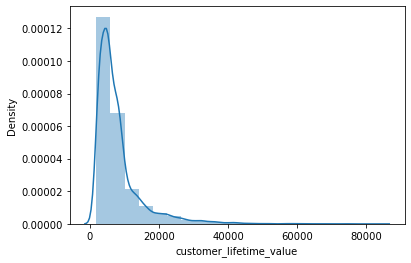

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


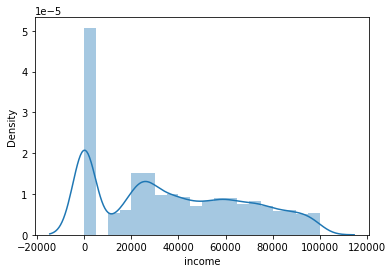

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


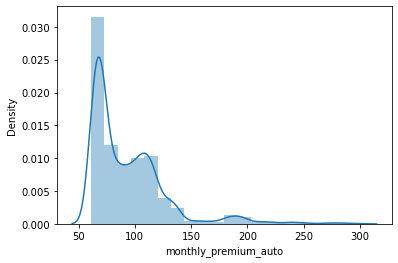

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


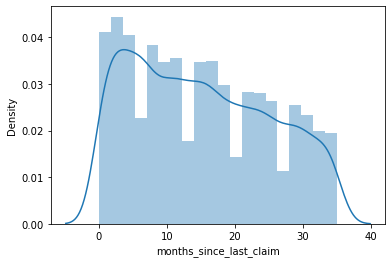

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


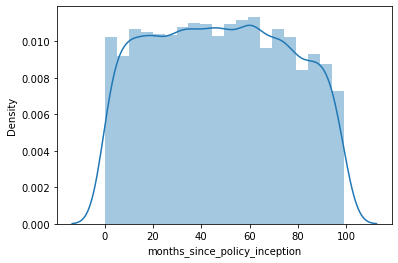

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


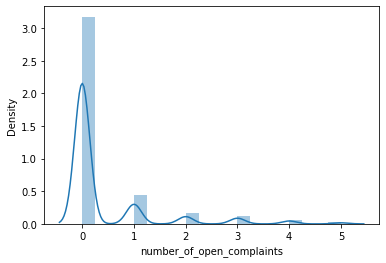

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


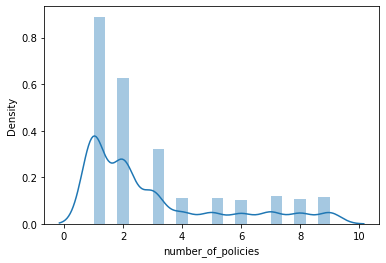

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


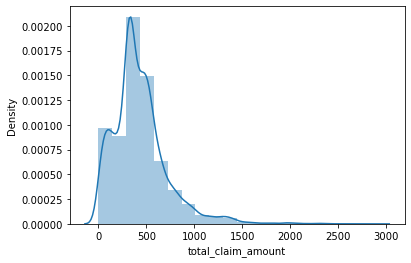

In [339]:
for name in numerical.columns:
    sns.distplot(numerical[name],bins=20)
    plt.show()

In [340]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


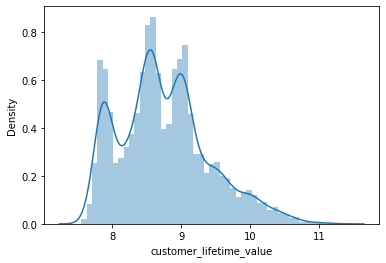

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


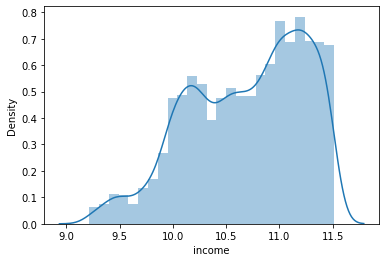

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


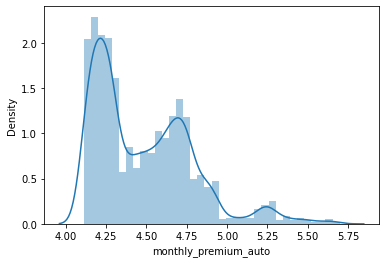

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


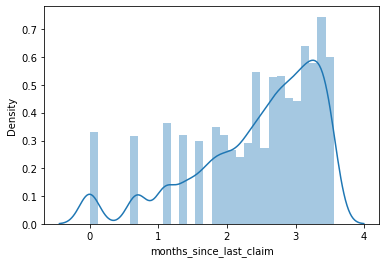

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


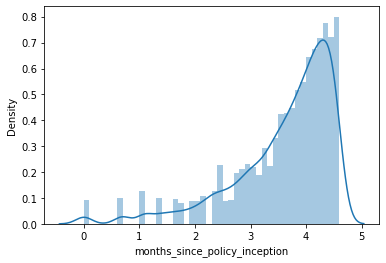

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


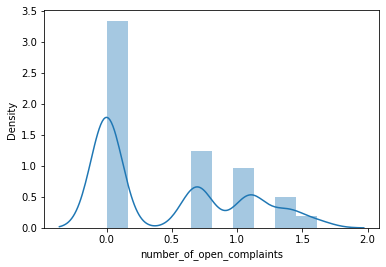

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


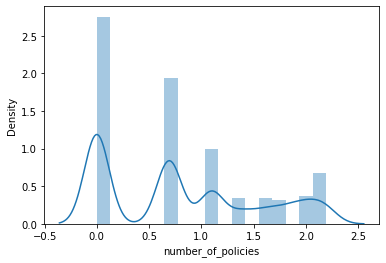

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


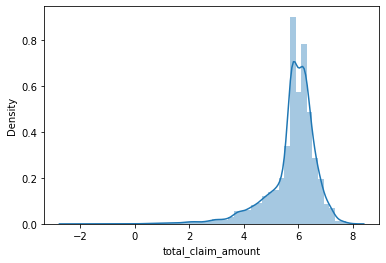

In [342]:
for i in numerical.columns:
    sns.distplot(pd.Series(numerical[i].apply(log_transfom_clean)))
    plt.show()